In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



# Data PreProcessing


### Data Visualization

In [24]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [26]:
features =['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
X = dataset[features]
Y = dataset['stroke']

In [27]:
X,Y

(      gender   age  hypertension  heart_disease ever_married      work_type  \
 0       Male  67.0             0              1          Yes        Private   
 1     Female  61.0             0              0          Yes  Self-employed   
 2       Male  80.0             0              1          Yes        Private   
 3     Female  49.0             0              0          Yes        Private   
 4     Female  79.0             1              0          Yes  Self-employed   
 ...      ...   ...           ...            ...          ...            ...   
 5105  Female  80.0             1              0          Yes        Private   
 5106  Female  81.0             0              0          Yes  Self-employed   
 5107  Female  35.0             0              0          Yes  Self-employed   
 5108    Male  51.0             0              0          Yes        Private   
 5109  Female  44.0             0              0          Yes       Govt_job   
 
      Residence_type  avg_glucose_leve

### Treating NaN, null Values

In [28]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [29]:
print(X.iloc[:,8:9])

       bmi
0     36.6
1      NaN
2     32.5
3     34.4
4     24.0
...    ...
5105   NaN
5106  40.0
5107  30.6
5108  25.6
5109  26.2

[5110 rows x 1 columns]


In [30]:
# Replacing Null Numeric vals

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(X.iloc[:,8:9])
X.iloc[:,8:9] = imputer.transform(X.iloc[:,8:9])
print(X.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


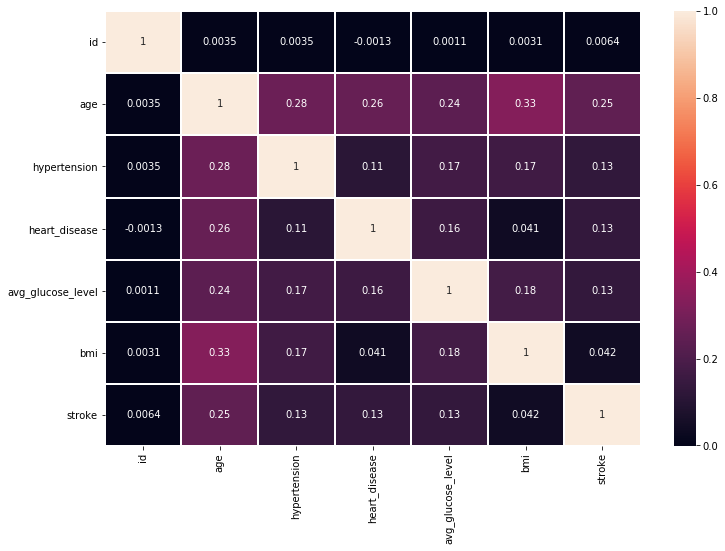

In [31]:
# dropping the rows having NaN values 
# df = pd.DataFrame(X)   
# df = df.dropna()   
# print(df)
plt.figure(figsize = (12, 8))
sns.heatmap(dataset.corr(), linecolor = 'white', linewidths = 1, annot = True)
plt.show()

In [32]:
X['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

### Treating Categorical Variables


In [33]:
X.dtypes
Categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
for col in Categorical_cols:
    print('Column Name: ' +col)
    print(X[col].value_counts())

Column Name: gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Column Name: ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
Column Name: work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Column Name: Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
Column Name: smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [34]:
# Treating Independent Varibles


# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
# df = np.array(ct.fit_transform(df))

                    #OR

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(OH_encoder.fit_transform(X[Categorical_cols]))

# One-hot encoding removed index; put it back
X_encoded.index = X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X.drop(Categorical_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, X_encoded], axis=1)

In [35]:
print(OH_X)

       age  hypertension  heart_disease  avg_glucose_level        bmi    0  \
0     67.0             0              1             228.69  36.600000  0.0   
1     61.0             0              0             202.21  28.893237  1.0   
2     80.0             0              1             105.92  32.500000  0.0   
3     49.0             0              0             171.23  34.400000  1.0   
4     79.0             1              0             174.12  24.000000  1.0   
...    ...           ...            ...                ...        ...  ...   
5105  80.0             1              0              83.75  28.893237  1.0   
5106  81.0             0              0             125.20  40.000000  1.0   
5107  35.0             0              0              82.99  30.600000  1.0   
5108  51.0             0              0             166.29  25.600000  0.0   
5109  44.0             0              0              85.28  26.200000  1.0   

        1    2    3    4  ...    6    7    8    9   10   11   1

In [36]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


In [37]:
OH_X.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,0,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.585910,0.413894,0.000196,0.343836,0.656164,...,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.492612,0.492578,0.013989,0.475034,0.475034,...,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting Dataset


In [38]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(OH_X, Y, test_size = 0.2, random_state = 1)

### Feature Scaling


In [39]:
X_train.iloc[:,0:5]

,age,hypertension,heart_disease,avg_glucose_level,bmi
4152,55.0,0,0,73.57,28.0
4051,55.0,0,0,231.15,22.3
5076,34.0,0,0,174.37,23.0
874,80.0,0,0,56.99,26.7
3534,61.0,0,0,108.18,19.1
...,...,...,...,...,...
2895,46.0,0,0,137.77,29.3
2763,45.0,0,0,63.73,32.0
905,31.0,0,0,76.26,35.6
3980,45.0,0,0,218.10,55.0


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,0:5] = sc.fit_transform(X_train.iloc[:,0:5])
X_test.iloc[:,0:5] = sc.transform(X_test.iloc[:,0:5])
print(X_train,X_test)

           age  hypertension  heart_disease  avg_glucose_level       bmi    0  \
4152  0.525978     -0.327504      -0.239632          -0.708689 -0.119923  0.0   
4051  0.525978     -0.327504      -0.239632           2.769942 -0.862341  0.0   
5076 -0.402645     -0.327504      -0.239632           1.516505 -0.771167  1.0   
874   1.631482     -0.327504      -0.239632          -1.074698 -0.289247  0.0   
3534  0.791299     -0.327504      -0.239632           0.055339 -1.279137  1.0   
...        ...           ...            ...                ...       ...  ...   
2895  0.127997     -0.327504      -0.239632           0.708548  0.049400  0.0   
2763  0.083777     -0.327504      -0.239632          -0.925910  0.401072  1.0   
905  -0.535305     -0.327504      -0.239632          -0.649306  0.869968  1.0   
3980  0.083777     -0.327504      -0.239632           2.481859  3.396794  1.0   
235   1.100840     -0.327504      -0.239632           2.326449  1.351888  1.0   

        1    2    3    4  .

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
from sklearn.utils import resample

train_data = pd.concat([X_train, Y_train], axis=1)
# separate minority and majority classes
negative = train_data[train_data.stroke==0]
positive = train_data[train_data.stroke==1]
# upsample minority
pos_upsampled = resample(positive,
 replace=True, # sample with replacement
 n_samples=len(negative), # match number in majority class
 random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])
# check new class counts
upsampled.stroke.value_counts()


1    3899
0    3899
Name: stroke, dtype: int64

In [42]:
upsampled


,age,hypertension,heart_disease,avg_glucose_level,bmi,0,1,2,3,4,...,7,8,9,10,11,12,13,14,15,stroke
4152,0.525978,-0.327504,-0.239632,-0.708689,-0.119923,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4051,0.525978,-0.327504,-0.239632,2.769942,-0.862341,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5076,-0.402645,-0.327504,-0.239632,1.516505,-0.771167,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
874,1.631482,-0.327504,-0.239632,-1.074698,-0.289247,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3534,0.791299,-0.327504,-0.239632,0.055339,-1.279137,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1.631482,-0.327504,4.173058,-0.819948,-0.614869,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
16,0.923960,-0.327504,4.173058,1.897083,1.117440,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
207,1.543042,-0.327504,-0.239632,-0.341797,-0.263197,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
149,1.189281,-0.327504,4.173058,2.944779,-0.367396,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [43]:
X_train = upsampled.iloc[:, 0:21]
Y_train = upsampled.iloc[:,21:22]
# del X_train['stroke']
print(X_train,Y_train)

           age  hypertension  heart_disease  avg_glucose_level       bmi    0  \
4152  0.525978     -0.327504      -0.239632          -0.708689 -0.119923  0.0   
4051  0.525978     -0.327504      -0.239632           2.769942 -0.862341  0.0   
5076 -0.402645     -0.327504      -0.239632           1.516505 -0.771167  1.0   
874   1.631482     -0.327504      -0.239632          -1.074698 -0.289247  0.0   
3534  0.791299     -0.327504      -0.239632           0.055339 -1.279137  1.0   
...        ...           ...            ...                ...       ...  ...   
111   1.631482     -0.327504       4.173058          -0.819948 -0.614869  0.0   
16    0.923960     -0.327504       4.173058           1.897083  1.117440  0.0   
207   1.543042     -0.327504      -0.239632          -0.341797 -0.263197  0.0   
149   1.189281     -0.327504       4.173058           2.944779 -0.367396  1.0   
72    1.012400      3.053397      -0.239632           0.240109  0.283848  1.0   

        1    2    3    4  .

In [44]:
Y_train.stroke.value_counts()

1    3899
0    3899
Name: stroke, dtype: int64

### Models


#### Regression


[[679 283]
 [  9  51]] Nodes:  10 0.7142857142857143
[[671 291]
 [ 11  49]] Nodes:  25 0.7045009784735812
[[723 239]
 [ 13  47]] Nodes:  50 0.7534246575342466
[[813 149]
 [ 35  25]] Nodes:  100 0.8199608610567515


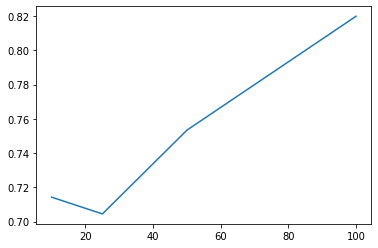

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix
nodes = [10,25,50,100]
accuracy =[]
for node in nodes:    
    model = DecisionTreeClassifier(random_state=1,max_leaf_nodes=node)
    model.fit(X_train,Y_train)
    preds = model.predict(X_test)
    accs = accuracy_score(Y_test,preds.round())
    accuracy.append(accs)
    print(confusion_matrix(Y_test,preds.round()),'Nodes: ', node,accs)
# print(accuracy)
sns.lineplot(nodes,accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[941  21]
 [ 58   2]] No of Estimators:  10 0.9227005870841487
[[941  21]
 [ 58   2]] No of Estimators:  15 0.9227005870841487
[[946  16]
 [ 59   1]] No of Estimators:  20 0.9266144814090019


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[946  16]
 [ 59   1]] No of Estimators:  25 0.9266144814090019
[[948  14]
 [ 59   1]] No of Estimators:  50 0.9285714285714286


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[948  14]
 [ 59   1]] No of Estimators:  100 0.9285714285714286


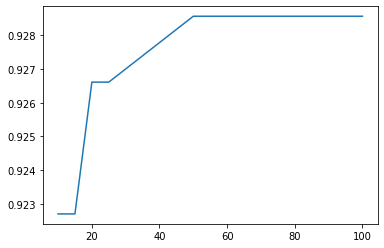

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error
nodes = [10,15,20,25,50,100]
accuracy =[]
for node in nodes:    
    model = RandomForestClassifier(criterion = 'entropy', random_state=0, n_estimators=node)
    model.fit(X_train,Y_train)
    preds = model.predict(X_test)
    accs = accuracy_score(Y_test,preds.round())
    accuracy.append(accs)
    print(confusion_matrix(Y_test,preds.round()),'No of Estimators: ', node,accs)

sns.lineplot(nodes,accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


[[856 106]
 [ 49  11]] No of Neighbors:  5 0.8483365949119374
[[801 161]
 [ 37  23]] No of Neighbors:  10 0.8062622309197651


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


[[725 237]
 [ 28  32]] No of Neighbors:  15 0.7407045009784736
[[701 261]
 [ 23  37]] No of Neighbors:  20 0.7221135029354208


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


[[651 311]
 [ 21  39]] No of Neighbors:  25 0.675146771037182


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


[[666 296]
 [ 15  45]] No of Neighbors:  50 0.6956947162426614


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


[[651 311]
 [ 12  48]] No of Neighbors:  100 0.6839530332681018


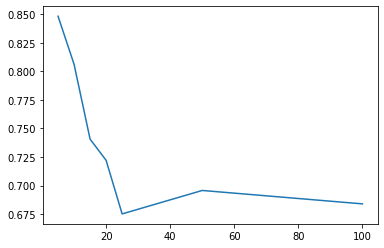

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error
nodes = [5,10,15,20,25,50,100]
accuracy =[]
for node in nodes:    
    classifier = KNeighborsClassifier(n_neighbors = node, metric = 'minkowski',p=2)
    classifier.fit(X_train,Y_train)
    preds = classifier.predict(X_test)
    accs = accuracy_score(Y_test,preds.round())
    accuracy.append(accs)
    print(confusion_matrix(Y_test,preds),'No of Neighbors: ', node,accs)

sns.lineplot(nodes,accuracy)



In [54]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(loss = 'mean_squared_error' , optimizer = 'adam')
ann.fit(X_train, Y_train, batch_size = 32, epochs = 100)
y_pred = ann.predict(X_test)
accs = accuracy_score(Y_test,y_pred.round())
print(confusion_matrix(Y_test,y_pred.round()),'No of Neighbors: ', node,accs)



Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

244/244 [==============================] - 0s 1ms/step - loss: 0.2829
Epoch 2/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1862
Epoch 3/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1670
Epoch 4/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1604
Epoch 5/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1565
Epoch 6/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1545
Epoch 7/100
244/

244/244 [==============================] - 0s 1ms/step - loss: 0.1228
Epoch 91/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1228
Epoch 92/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1225
Epoch 93/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1223
Epoch 94/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1225
Epoch 95/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1221
Epoch 96/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1224
Epoch 97/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1226
Epoch 98/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1222
Epoch 99/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1220
Epoch 100/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1220
[[700 262]
 [ 18  42]] No of Neighbors:  100 0.726027397260274
